In [ ]:
#Author: Jabulani Mavodze
#Project: Absa Corporate Client Forecast
#Date Opened: 01 November 2022
#Deadline: 27 November 2022
#Email:jabulani1mavodze@gmail.com
#Feature Engineering and Feature Selection Notebook

# Dataframe and plotting
import pandas as pd
import numpy as np
from numpy import sort
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime, date

# Machine learning/Scikit learn
from sklearn.feature_selection import mutual_info_classif
from sklearn.feature_selection import SelectKBest
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.feature_selection import SelectFromModel
from xgboost.plotting import plot_importance
from sklearn.model_selection import train_test_split

# Filing 
from google.colab import files
import warnings
warnings.filterwarnings('ignore')

In [ ]:
# Uploading files to the notebook.
from google.colab import files
uploaded = files.upload()

Saving test_df.csv to test_df.csv


In [ ]:
df = pd.read_csv('train_df.csv')
df.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,day,dayofweek,hour,minute,Period,date
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3,19,4,7,8,Morning,2021-02-19
1,2021-02-18 07:27:27,35,3890,200,18,138,3,18,3,7,27,Morning,2021-02-18
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,24,2,2,28,Midnight,2021-02-24
3,2021-02-19 12:02:11,14,3040,853,15,973,3,19,4,12,2,Noon,2021-02-19
4,2021-03-21 09:37:26,14,5177,201,18,702,3,21,6,9,37,Morning,2021-03-21


In [ ]:
df.drop(["date"],axis=1,inplace=True)

In [ ]:
df.head()

,eventdatetime,event,userid,useremaildomain,userrole,companyprofileid,country,day,dayofweek,hour,minute,Period
0,2021-02-19 07:08:14,32,4323,1155,18,1354,3,19,4,7,8,Morning
1,2021-02-18 07:27:27,35,3890,200,18,138,3,18,3,7,27,Morning
2,2021-02-24 02:28:11,14,5004,1604,63,1869,3,24,2,2,28,Midnight
3,2021-02-19 12:02:11,14,3040,853,15,973,3,19,4,12,2,Noon
4,2021-03-21 09:37:26,14,5177,201,18,702,3,21,6,9,37,Morning


In [ ]:
df1 = df.copy()

In [ ]:
df1[ "target" ] = df [ "event" ] == 14

df1["target" ] = pd.get_dummies(df1.target,
                                    drop_first=True)
df1.drop(["eventdatetime","event","companyprofileid"],
             axis=1,inplace=True)
df1.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period,target
0,4323,1155,18,3,19,4,7,8,Morning,0
1,3890,200,18,3,18,3,7,27,Morning,0
2,5004,1604,63,3,24,2,2,28,Midnight,1
3,3040,853,15,3,19,4,12,2,Noon,1
4,5177,201,18,3,21,6,9,37,Morning,1


In [ ]:
df1.to_csv("train_aux.csv",index=False)

In [ ]:
df_Period = pd.get_dummies(df.Period)
df_Period.head()

,Midnight,Morning,Night,Noon
0,0,1,0,0
1,0,1,0,0
2,1,0,0,0
3,0,0,0,1
4,0,1,0,0


In [ ]:
df_enco = pd.concat([df,df_Period],axis=1)

In [ ]:
df_enco[ "target" ] = df [ "event" ] == 14

df_enco["target" ] = pd.get_dummies(df_enco.target,
                                    drop_first=True)
df_enco.drop(["eventdatetime","event","Period","companyprofileid"],
             axis=1,inplace=True)
df_enco.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon,target
0,4323,1155,18,3,19,4,7,8,0,1,0,0,0
1,3890,200,18,3,18,3,7,27,0,1,0,0,0
2,5004,1604,63,3,24,2,2,28,1,0,0,0,1
3,3040,853,15,3,19,4,12,2,0,0,0,1,1
4,5177,201,18,3,21,6,9,37,0,1,0,0,1


In [ ]:
df_enco.to_csv("train_final.csv",index=False)

In [ ]:
df_test = pd.read_csv('test_df.csv')
df_test.head()

,UserID_Day_Month_Hour,eventdatetime,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,User2910_Wed_3_18,2021-03-24 18:00:00,2910,810,18,9,24,2,18,0,Night
1,User2910_Wed_3_12,2021-03-24 12:00:00,2910,810,18,9,24,2,12,0,Noon
2,User2910_Wed_3_6,2021-03-24 06:00:00,2910,810,18,9,24,2,6,0,Morning
3,User2910_Wed_3_0,2021-03-24 00:00:00,2910,810,18,9,24,2,0,0,Midnight
4,User2784_Wed_3_12,2021-03-24 12:00:00,2784,201,18,3,24,2,12,0,Noon


In [ ]:
df_test.drop(["eventdatetime","UserID_Day_Month_Hour"],
             axis=1,inplace=True)
df_test.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Period
0,2910,810,18,9,24,2,18,0,Night
1,2910,810,18,9,24,2,12,0,Noon
2,2910,810,18,9,24,2,6,0,Morning
3,2910,810,18,9,24,2,0,0,Midnight
4,2784,201,18,3,24,2,12,0,Noon


In [ ]:
df_test.to_csv("test_aux.csv",index=False)

In [ ]:
df_test_Period = pd.get_dummies(df_test.Period)
df_test_Period.head()

,Midnight,Morning,Night,Noon
0,0,0,1,0
1,0,0,0,1
2,0,1,0,0
3,1,0,0,0
4,0,0,0,1


In [ ]:
df_test_enco = pd.concat([df_test,df_test_Period],
                          axis=1)
df_test_enco.drop(["Period"],
                  axis=1,
                  inplace=True)
df_test_enco.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
0,2910,810,18,9,24,2,18,0,0,0,1,0
1,2910,810,18,9,24,2,12,0,0,0,0,1
2,2910,810,18,9,24,2,6,0,0,1,0,0
3,2910,810,18,9,24,2,0,0,1,0,0,0
4,2784,201,18,3,24,2,12,0,0,0,0,1


In [ ]:
df_test_enco.to_csv("test_final.csv",index=False)

In [ ]:
df_test_enco.userid.unique()

array([2910, 2784, 2290, ..., 4341, 1996, 3892])

In [ ]:
train_split = df_enco.copy()
train_split.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon,target
0,4323,1155,18,3,19,4,7,8,0,1,0,0,0
1,3890,200,18,3,18,3,7,27,0,1,0,0,0
2,5004,1604,63,3,24,2,2,28,1,0,0,0,1
3,3040,853,15,3,19,4,12,2,0,0,0,1,1
4,5177,201,18,3,21,6,9,37,0,1,0,0,1


In [ ]:
train_split.shape

(1373621, 13)

In [ ]:
X_train.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
207560,1522,933,18,3,6,5,6,49,0,1,0,0
590443,6452,1106,18,9,27,5,7,53,0,1,0,0
1340770,3717,159,18,4,3,2,11,13,0,1,0,0
996876,5750,1388,18,2,22,0,8,55,0,1,0,0
298631,4056,2146,57,3,21,6,12,21,0,0,0,1


In [ ]:
X_train.shape

(1098896, 12)

In [ ]:
X_test.head()

,userid,useremaildomain,userrole,country,day,dayofweek,hour,minute,Midnight,Morning,Night,Noon
1201276,6414,1183,18,9,7,6,13,28,0,0,0,1
573932,3025,525,18,9,12,4,8,52,0,1,0,0
714296,1382,296,18,2,26,4,6,40,0,1,0,0
1070027,3772,53,18,3,3,2,7,34,0,1,0,0
895689,4422,1183,18,3,7,6,8,51,0,1,0,0


In [ ]:
X_test.shape

(274725, 12)

In [ ]:
y_train.head()

207560     0
590443     0
1340770    0
996876     0
298631     0
Name: target, dtype: uint8

In [ ]:
y_test.head()

1201276    1
573932     0
714296     0
1070027    1
895689     0
Name: target, dtype: uint8

In [ ]:
# determine the mutual information
mutual_info = mutual_info_classif(X_train, y_train)
mutual_info

array([0.15463221, 0.11306981, 0.14520709, 0.06134216, 0.0074363 ,
       0.02555586, 0.01709049, 0.00189227, 0.00432482, 0.04575801,
       0.00032444, 0.01635106])

In [ ]:
mutual_info = pd.Series(mutual_info)
mutual_info.index = X_train.columns
mutual_info.sort_values(ascending=False)

userid             0.154632
userrole           0.145207
useremaildomain    0.113070
country            0.061342
Morning            0.045758
dayofweek          0.025556
hour               0.017090
Noon               0.016351
day                0.007436
Midnight           0.004325
minute             0.001892
Night              0.000324
dtype: float64

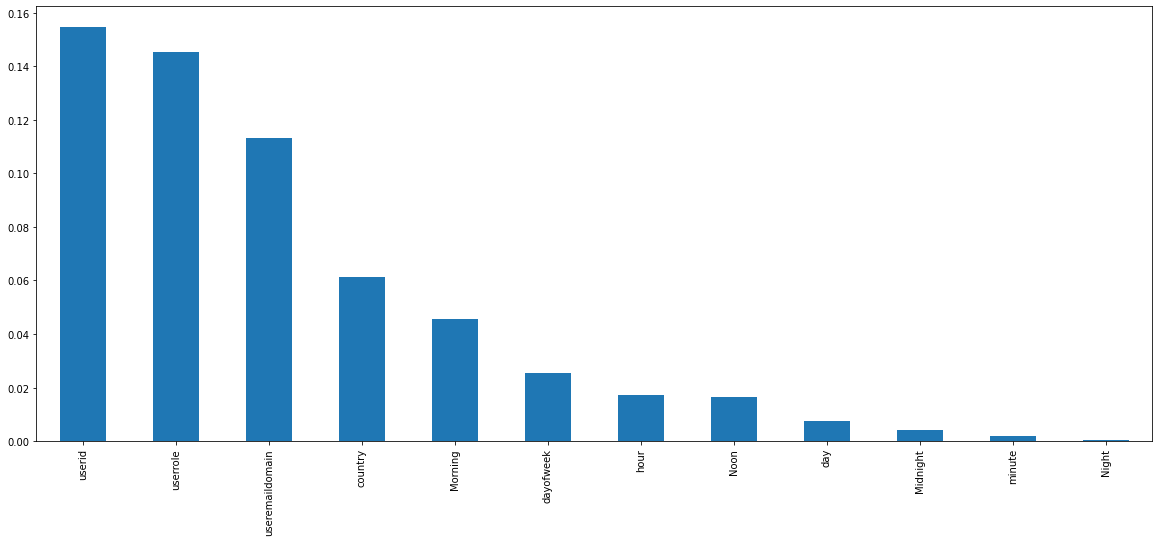

In [ ]:
#Plotting the ordered mutual_info values per feature.
mutual_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

In [ ]:
#Selecting the  top 10 important features
sel_cols = SelectKBest(mutual_info_classif, k=10)
sel_cols.fit(X_train, y_train)
X_train.columns[sel_cols.get_support()]

Index(['userid', 'useremaildomain', 'userrole', 'country', 'day', 'dayofweek',
       'hour', 'Midnight', 'Morning', 'Noon'],
      dtype='object')

In [ ]:
mutual_info_sel = pd.Series(X_train.columns[sel_cols.get_support()])
mutual_info_sel.sort_values(ascending=False)

2           userrole
0             userid
1    useremaildomain
6               hour
5          dayofweek
4                day
3            country
9               Noon
8            Morning
7           Midnight
dtype: object

In [ ]:

model = XGBClassifier()
model.fit(X_train,y_train)
model.feature_importances_

array([0.06892271, 0.14691816, 0.06723011, 0.35900694, 0.05588318,
       0.04285103, 0.21654326, 0.00549008, 0.        , 0.002881  ,
       0.        , 0.03427356], dtype=float32)

In [ ]:
X_info = pd.Series(model.feature_importances_)
X_info.index = X_train.columns
X_info.sort_values(ascending=False)

country            0.359007
hour               0.216543
useremaildomain    0.146918
userid             0.068923
userrole           0.067230
day                0.055883
dayofweek          0.042851
Noon               0.034274
minute             0.005490
Morning            0.002881
Midnight           0.000000
Night              0.000000
dtype: float32

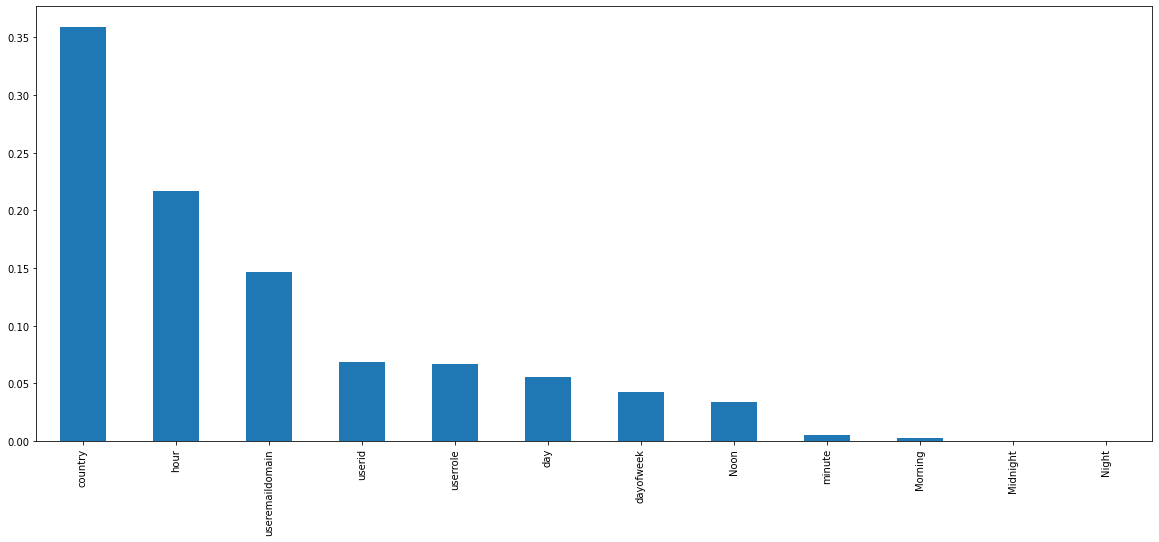

In [ ]:
X_info.sort_values(ascending=False).plot.bar(figsize=(20, 8))

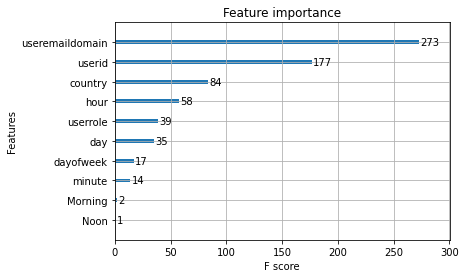

In [ ]:

plot_importance(model)
plt.show()

In [ ]:

y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
accuracy = accuracy_score(y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))
# Fit model using each importance as a threshold
thresholds = sort(model.feature_importances_)
for thresh in thresholds:
	# select features using threshold
	selection = SelectFromModel(model, threshold=thresh, prefit=True)
	select_X_train = selection.transform(X_train)
	# train model
	selection_model = XGBClassifier()
	selection_model.fit(select_X_train, y_train)
	# eval model
	select_X_test = selection.transform(X_test)
	y_pred = selection_model.predict(select_X_test)
	predictions = [round(value) for value in y_pred]
	accuracy = accuracy_score(y_test, predictions)
	print("Thresh=%.3f, n=%d, Accuracy: %.2f%%" % (thresh, select_X_train.shape[1], accuracy*100.0))

Accuracy: 60.93%
Thresh=0.000, n=12, Accuracy: 60.93%
Thresh=0.000, n=12, Accuracy: 60.93%
Thresh=0.003, n=10, Accuracy: 60.93%
Thresh=0.005, n=9, Accuracy: 60.93%
Thresh=0.034, n=8, Accuracy: 61.07%
Thresh=0.043, n=7, Accuracy: 60.97%
Thresh=0.056, n=6, Accuracy: 61.06%
Thresh=0.067, n=5, Accuracy: 61.36%
Thresh=0.069, n=4, Accuracy: 61.33%
Thresh=0.147, n=3, Accuracy: 60.33%
Thresh=0.217, n=2, Accuracy: 57.59%
Thresh=0.359, n=1, Accuracy: 56.62%
